# 88-Inch Foil Activation Experiment to measure 33MeV Deutron Break-up on Ta neutron Spectrum

This notebook contains the code necessary to generate STAYSL inputs, a description on how to run STAYSL, and the anaysis and plotting of the resulting outputs.  

## BCF

The STASYL BCF input files are generated from the recoded beam current monitor files stores at:

In [1]:
from Support.Utilities import check_path

bcmPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/CleanBeam_Trimmed.bcm'
check_path(bcmPath)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/CleanBeam_Trimmed.bcm


True

The file used is a modified version of the BCM created file where pre and post calibrations are removed from the file; only the actual irradiation measurements are included.

Support for generating the BCF input files can be found in the [PyScripts Repo](http://github.com/jamesbevins/PyScripts). 

In [2]:
from Unfolding.STAYSL import bcmToBCF

bcfPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/BCF/flux_history.dat'
bcmToBCF(bcmPath, bcfPath)

The total measurment time was 7866.0 seconds with an integrated measurement of 0.041859432.


The BCF file will be placed at the path indicated above.  The BCF code can be executed by double clicking on the BCF executable and typing in the BCF input file name.

## SHIELD

SHIELD requires a fine group cross section file.  For this, the [14468 group shield cross sections](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shld_xsect.out) were used.

NOTE: SHIELD is only valid/necessary for non-threshold reactions.

The course group structure is specified in the [shldengrp.dat](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldengrp.dat) file, but this is not required with STAYSL PNNL v 1.2.0.

The [input file](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.dat) was generated using as measured quantities found in the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx).

SHIELD is ran by double clicking the SHIELD executable located in the same directory as the input files.

## SigPhi Calculator

The [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) was filled in with data from the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx), [BCF output](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/BCF/flux_history.out), and the [experimental analysis data](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/33MeV_ETA_Activation_Analysis.pdf).

** Note: the activities are in units of Bq/g and were adjusted as such from the calculated $A_0$ values **

## STAYSL_PNNL

The STAYSL_PNNL input file was created from the [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) and [MCNP simulation results]().

Default values for covariance data using Gaussian formalism were used.

The [SHIELD library input file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/sshldlib.dat) is an appropriately named copy of the [SHIELD ouput file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.out).

The flux normalization factor (TNORM) for the MCNP flux was calculated using the [Beam Calcs spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/ETA_88_BeamCalcs.xlsx) and experimental data.

To get the flux and flux uncertainty data from the MCNP output into STAYSL format:

In [3]:
from GeneralNuclear.MCNP import read_tally
from Unfolding.STAYSL import stayslFlux

simPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/BeamOnly/Model/33MeVTaBeamOnly_Foil_TestCut.o'
check_path(simPath)

(tallyFrame,tallyTot, ucertTot) = read_tally(simPath, 214, readGroups=True, splitTally=False)

stayslFlux(tallyFrame, maxBinAdjust=30, adjFlux=5E-9, adjUncert=1.0)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/BeamOnly/Model/33MeVTaBeamOnly_Foil_TestCut.o
The flux:
 5.0000e-09 5.9658e-10 3.3105e-09 7.3413e-09 5.5448e-09 3.8396e-09 2.9108e-09 
 2.1463e-09 1.7558e-09 1.1270e-09 7.0451e-10 7.0414e-10 8.1038e-10 1.0522e-09 
 1.1427e-09 1.0875e-09 1.8313e-09 1.2878e-09 8.2658e-10 1.2799e-09 1.8487e-09 
 9.3718e-10 1.8186e-09 1.1280e-09 4.8416e-10 4.9511e-10 5.2916e-10 1.0874e-09 
 1.1649e-09 7.8652e-10 9.0167e-10 1.9005e-09 1.0445e-09 6.0306e-10 5.0935e-10 
 1.3961e-09 9.3846e-10 1.1765e-09 2.1001e-09 1.1833e-09 1.5757e-09 2.6332e-09 
 1.9251e-09 3.9669e-09 5.3677e-09 3.6788e-09 3.0058e-09 8.9772e-09 9.8661e-09 
 1.8694e-08 2.3001e-08 2.4866e-08 2.6623e-08 3.3887e-08 3.8048e-08 4.4267e-08 
 5.1840e-08 3.7116e-08 5.1845e-08 6.1626e-08 8.7745e-08 8.6490e-08 8.9304e-08 
 9.2638e-08 1.0444e-07 1.0667e-07 1.1373e-07 1.0654e-07 1.4164e-07 1.4561e-07 
 3.8050e-07 3.8831e-07 3.7847e-07 3.7171e-07 3.7737e

The STAYSL code is ran by double clicking the executable or running from the command line. 

## Output Analysis

Read the data from the output file using pandas. Convert relative std to absolute.

In [4]:
import pandas as pd

path = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/stayslin.out'
df = pd.read_table(path, engine='python', sep='\s+', skiprows=99, skipfooter=649, header=None,
                   names=['lowE', 'adjFlux', 'unadjFlux', 'fluxRatio', 'adjStd', 
                          'unadjStd', 'uncertRatio', 'integralFlux', 'intFluxUncert'])

df.apply(pd.to_numeric)
df['adjStd'] = df['adjStd'] * df['adjFlux'] / 100
df['unadjStd'] = df['unadjStd'] * df['unadjFlux'] / 100

df

,lowE,adjFlux,unadjFlux,fluxRatio,adjStd,unadjStd,uncertRatio,integralFlux,intFluxUncert
1,1.000000e-10,1.169300e+11,2.255600e+10,5.184,2.034582e+10,2.255600e+10,0.174,324980.000,0.52
2,1.000000e-09,5.608700e+08,2.691200e+08,2.084,2.512698e+07,6.978282e+07,0.173,324870.000,0.52
3,1.000000e-08,1.803600e+09,1.033900e+09,1.744,8.278524e+07,1.876528e+08,0.253,324870.000,0.52
4,2.300000e-08,1.580600e+09,1.103900e+09,1.432,6.195952e+07,1.206563e+08,0.359,324840.000,0.52
5,5.000000e-08,1.430900e+09,8.658400e+08,1.653,1.153305e+08,1.504830e+08,0.464,324800.000,0.52
6,7.600000e-08,5.651600e+08,3.997100e+08,1.414,3.763966e+07,4.728569e+07,0.563,324760.000,0.52
7,1.150000e-07,3.196400e+08,2.148700e+08,1.488,3.145258e+07,3.255280e+07,0.650,324740.000,0.52
8,1.700000e-07,2.039600e+08,1.025200e+08,1.990,5.005178e+07,3.470302e+07,0.725,324720.000,0.52
9,2.550000e-07,1.149800e+08,5.702800e+07,2.016,3.519538e+07,2.216108e+07,0.788,324710.000,0.52
10,3.800000e-07,4.382400e+07,2.691500e+07,1.628,9.991872e+06,7.318188e+06,0.838,324690.000,0.52


Convert to Histograms and plot the adjusted and unadjusted flux.

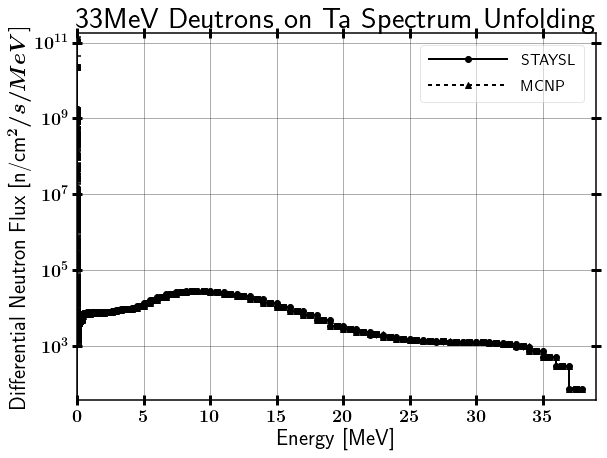

In [5]:
from DataAnalysis.Histograms import Histogram
import matplotlib
%matplotlib inline

outpath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/'

adjDiffHisto = Histogram()
adjDiffHisto.build_histo(df['lowE'].tolist(), df['adjFlux'].tolist(), uncert=df['adjStd'].tolist(),
                     edgeLoc='low', name='STAYSL')

unadjDiffHisto = Histogram()
unadjDiffHisto.build_histo(df['lowE'].tolist(), df['unadjFlux'].tolist(), uncert=df['unadjStd'].tolist(),
                     edgeLoc='low', name='MCNP')

adjDiffHisto.plot(unadjDiffHisto, xMin=1E-6, logX=False, logY=True,
                  title='33MeV Deutrons on Ta Spectrum Unfolding',
                  xLabel='Energy [MeV]', yLabel='Differential Neutron Flux [n/cm^2/s/MeV]',
                  savePath=outpath+'33MeVTa_Staysl-Unfold_Differential')

Convert from differential spectrum and plot.

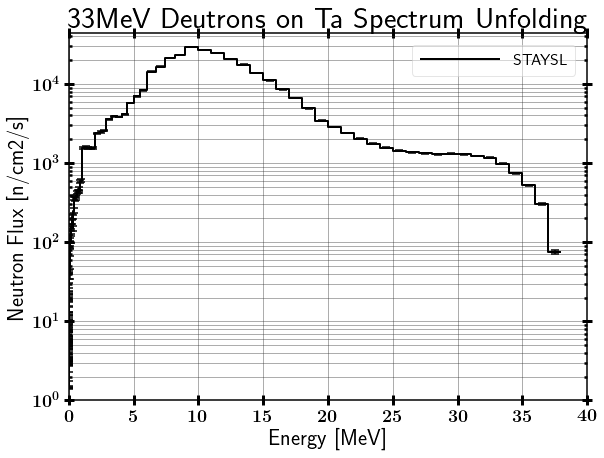

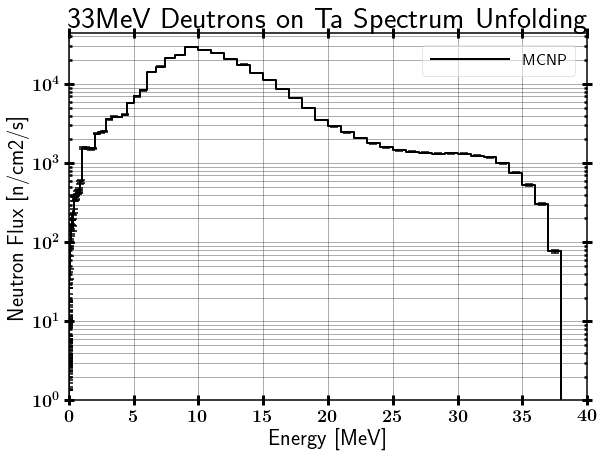

C:\Users\James\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


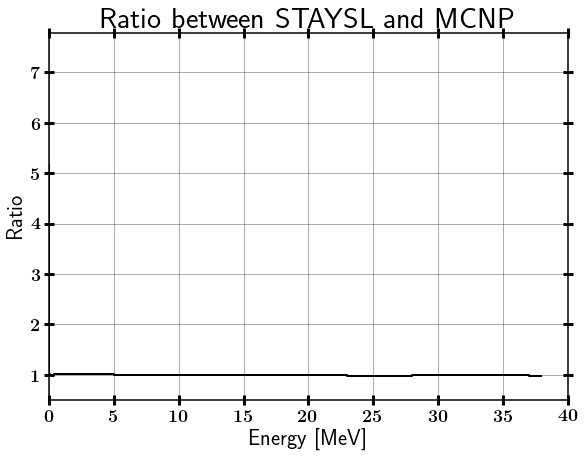

In [6]:
from DataAnalysis.DataManipulation import bin_integration

adjHisto = Histogram()
adjHisto.build_histo(df['lowE'].tolist(),
                     bin_integration(df['lowE'].tolist(), df['adjFlux'].tolist(), 'low'),
                     uncert=bin_integration(df['lowE'].tolist(), df['adjStd'].tolist(), 'low'),
                     edgeLoc='low', name='STAYSL')

adjHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold')

mcnpHisto = Histogram()
normFactor = 4.0600E+9
tallyFrame['normTally'] = tallyFrame['tally'] * normFactor
tallyFrame['normUncertainty'] = tallyFrame['uncertainty'] * tallyFrame['normTally']
mcnpHisto.build_histo(tallyFrame['bin'].tolist(), tallyFrame['normTally'].tolist(), 
                       uncert=tallyFrame['normUncertainty'].tolist(), edgeLoc='up', name='MCNP')
mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_MCNP')

ratioHisto = Histogram()
ratioHisto.build_histo(df['lowE'].tolist(), df['fluxRatio'].tolist(), edgeLoc='low')
ratioHisto.plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP',
              xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio')

### Iterative Solution #1:

  - The iterative solution sets the uncertainty below 3 MeV to 100%.
  - It does not update the uncertainty until $\chi^2$ converged.

In [7]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration1/'

# Build Data Structure Lists
iterSoln = []
iterAdjHisto = []
iterRatioHisto = []

iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=False, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration1/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: False
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration1/stayslin.out
Chi^2 = 47.24115, Std Norm = 7.80935935401
Chi^2 = 42.73122
Chi^2 = 42.25472
Chi^2 = 41.99539
Chi^2 = 41.84653
Chi^2 = 41.74682
Chi^2 = 41.66565
Chi^2 = 41.5878
Chi^2 = 41.51116
Chi^2 = 41.43428
Chi^2 = 41.35622
Chi^2 = 41.27909
Chi^2 = 41.2028
Chi^2 = 41.1276
Chi^2 = 41.05467
Chi^2 = 40.98378
Chi^2 = 40.91304
Chi^2 = 40.84503
Chi^2 = 40.78043
Chi^2 = 40.71819
Chi^2 = 40.65754
Chi^2 = 40.59954
Chi^2 = 40.54331
Chi^2 = 40.48873
Chi^2 = 40.43636
Chi^2 = 40.38444
Chi^2 = 40.33554
Chi^2 = 40.2872
Chi^2 = 40.24048
Chi^2 = 40.19472
Chi^2 = 40.14883
Chi^2

Chi^2 = 27.63666
Chi^2 = 27.61615
Chi^2 = 27.59566
Chi^2 = 27.57462
Chi^2 = 27.55389
Chi^2 = 27.53324
Chi^2 = 27.51284
Chi^2 = 27.49223
Chi^2 = 27.47203
Chi^2 = 27.45114
Chi^2 = 27.43127
Chi^2 = 27.40965
Chi^2 = 27.38933
Chi^2 = 27.36852
Chi^2 = 27.3482
Chi^2 = 27.32781
Chi^2 = 27.30761
Chi^2 = 27.28749
Chi^2 = 27.2672
Chi^2 = 27.24658
Chi^2 = 27.22679
Chi^2 = 27.20652
Chi^2 = 27.18617
Chi^2 = 27.16615
Chi^2 = 27.1456
Chi^2 = 27.12582
Chi^2 = 27.10535
Chi^2 = 27.08549
Chi^2 = 27.06574
Chi^2 = 27.04534
Chi^2 = 27.02548
Chi^2 = 27.00484
Chi^2 = 26.98491
Chi^2 = 26.96541
Chi^2 = 26.94486
Chi^2 = 26.92516
Chi^2 = 26.90543
Chi^2 = 26.88477
Chi^2 = 26.86539
Chi^2 = 26.84513
Chi^2 = 26.82544
Chi^2 = 26.80596
Chi^2 = 26.78599
Chi^2 = 26.76666
Chi^2 = 26.74674
Chi^2 = 26.72705
Chi^2 = 26.70796
Chi^2 = 26.68761
Chi^2 = 26.66814
Chi^2 = 26.64863
Chi^2 = 26.62896
Chi^2 = 26.60979
Chi^2 = 26.58971
Chi^2 = 26.57046
Chi^2 = 26.55122
Chi^2 = 26.53228
Chi^2 = 26.51217
Chi^2 = 26.49227
Chi^2 = 26.47238


Chi^2 = 20.09304
Chi^2 = 20.08204
Chi^2 = 20.07104
Chi^2 = 20.06026
Chi^2 = 20.04906
Chi^2 = 20.03782
Chi^2 = 20.02615
Chi^2 = 20.01475
Chi^2 = 20.00362
Chi^2 = 19.99285
Chi^2 = 19.98189
Chi^2 = 19.97127
Chi^2 = 19.95995
Chi^2 = 19.94875
Chi^2 = 19.93743
Chi^2 = 19.92584
Chi^2 = 19.91484
Chi^2 = 19.90451
Chi^2 = 19.89415
Chi^2 = 19.88318
Chi^2 = 19.87215
Chi^2 = 19.86072
Chi^2 = 19.84923
Chi^2 = 19.83805
Chi^2 = 19.82744
Chi^2 = 19.81672
Chi^2 = 19.80547
Chi^2 = 19.79424
Chi^2 = 19.78316
Chi^2 = 19.77171
Chi^2 = 19.76046
Chi^2 = 19.74995
Chi^2 = 19.73968
Chi^2 = 19.72966
Chi^2 = 19.71907
Chi^2 = 19.70757
Chi^2 = 19.69642
Chi^2 = 19.68554
Chi^2 = 19.67481
Chi^2 = 19.66392
Chi^2 = 19.65345
Chi^2 = 19.6426
Chi^2 = 19.63213
Chi^2 = 19.62164
Chi^2 = 19.61006
Chi^2 = 19.59883
Chi^2 = 19.58785
Chi^2 = 19.57679
Chi^2 = 19.56645
Chi^2 = 19.55575
Chi^2 = 19.54547
Chi^2 = 19.53428
Chi^2 = 19.52278
Chi^2 = 19.51156
Chi^2 = 19.50078
Chi^2 = 19.49054
Chi^2 = 19.48013
Chi^2 = 19.46946
Chi^2 = 19.4586

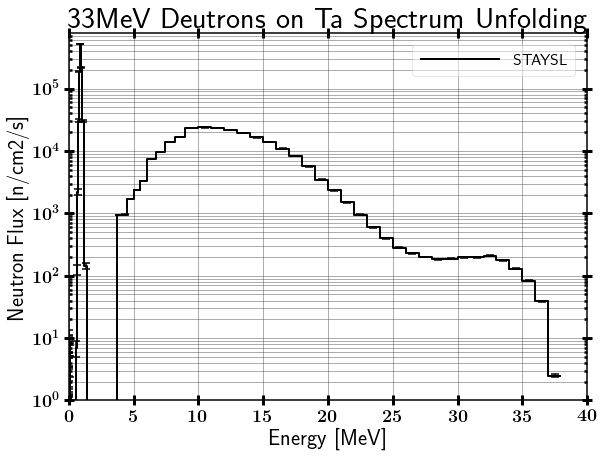

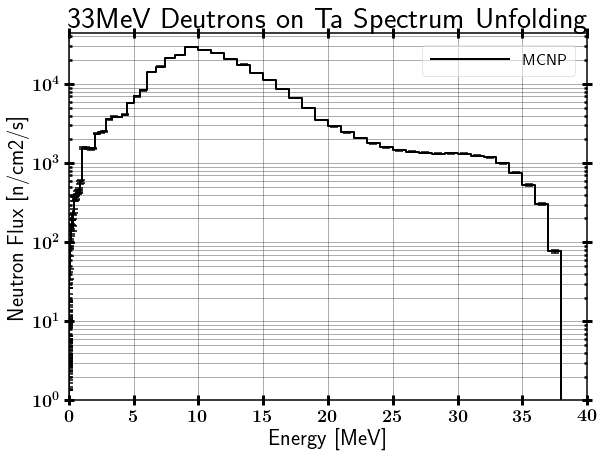

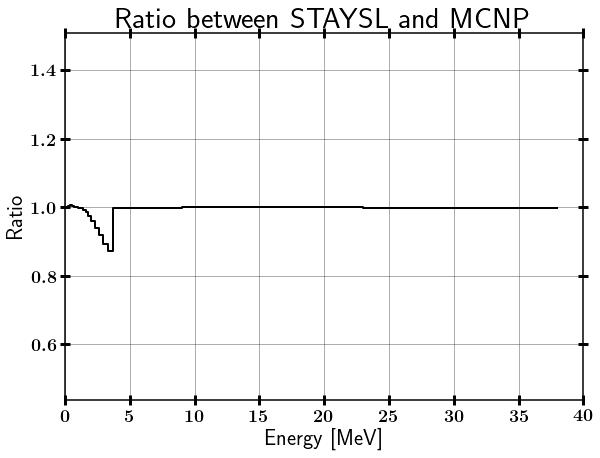

In [8]:
iter = 0

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #2:

  - The iterative solution sets the uncertainty below 3 MeV to 100%.
  - It does update the uncertainty throughout the convergence process.

In [9]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration2/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration2/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration2/stayslin.out
Chi^2 = 47.24115, Std Norm = 7.80935935401
Chi^2 = 42.81681
Chi^2 = 42.55892
Chi^2 = 42.48646
Chi^2 = 42.43405
Chi^2 = 42.36553
Chi^2 = 42.27905
Chi^2 = 42.17823
Chi^2 = 42.07155
Chi^2 = 41.96024
Chi^2 = 41.85037
Chi^2 = 41.74026
Chi^2 = 41.63233
Chi^2 = 41.52526
Chi^2 = 41.42225
Chi^2 = 41.3209
Chi^2 = 41.22199
Chi^2 = 41.12646
Chi^2 = 41.03331
Chi^2 = 40.94317
Chi^2 = 40.85501
Chi^2 = 40.76991
Chi^2 = 40.68592
Chi^2 = 40.60452
Chi^2 = 40.52517
Chi^2 = 40.44706
Chi^2 = 40.37124
Chi^2 = 40.29626
Chi^2 = 40.22163
Chi^2 = 40.14935
Chi^2 = 40.07694
Chi

Chi^2 = 20.23766
Chi^2 = 20.21008
Chi^2 = 20.18238
Chi^2 = 20.15522
Chi^2 = 20.12774
Chi^2 = 20.10012
Chi^2 = 20.07292
Chi^2 = 20.0457
Chi^2 = 20.0187
Chi^2 = 19.99162
Chi^2 = 19.96494
Chi^2 = 19.93802
Chi^2 = 19.9114
Chi^2 = 19.88402
Chi^2 = 19.85717
Chi^2 = 19.83017
Chi^2 = 19.80394
Chi^2 = 19.77753
Chi^2 = 19.75077
Chi^2 = 19.72432
Chi^2 = 19.69768
Chi^2 = 19.67079
Chi^2 = 19.64389
Chi^2 = 19.61804
Chi^2 = 19.59185
Chi^2 = 19.56527
Chi^2 = 19.5394
Chi^2 = 19.51286
Chi^2 = 19.48616
Chi^2 = 19.46038
Chi^2 = 19.43457
Chi^2 = 19.40798
Chi^2 = 19.38188
Chi^2 = 19.35577
Chi^2 = 19.33003
Chi^2 = 19.30419
Chi^2 = 19.27866
Chi^2 = 19.2534
Chi^2 = 19.22792
Chi^2 = 19.2028
Chi^2 = 19.17773
Chi^2 = 19.15274
Chi^2 = 19.12749
Chi^2 = 19.10254
Chi^2 = 19.07763
Chi^2 = 19.05257
Chi^2 = 19.02797
Chi^2 = 19.00325
Chi^2 = 18.9785
Chi^2 = 18.95393
Chi^2 = 18.92933
Chi^2 = 18.90488
Chi^2 = 18.8802
Chi^2 = 18.8559
Chi^2 = 18.83136
Chi^2 = 18.80695
Chi^2 = 18.78242
Chi^2 = 18.75795
Chi^2 = 18.73336
Chi^2 

Chi^2 = 11.79733
Chi^2 = 11.78692
Chi^2 = 11.77656
Chi^2 = 11.76641
Chi^2 = 11.75639
Chi^2 = 11.74601
Chi^2 = 11.73575
Chi^2 = 11.72539
Chi^2 = 11.71518
Chi^2 = 11.70469
Chi^2 = 11.69443
Chi^2 = 11.68423
Chi^2 = 11.67428
Std Norm = 1.65011301431, 1.65049921539


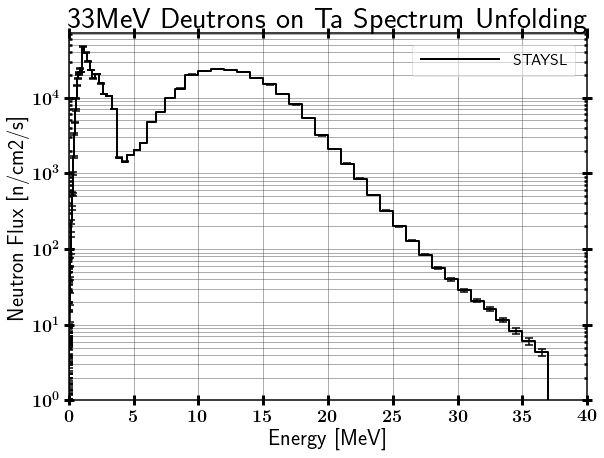

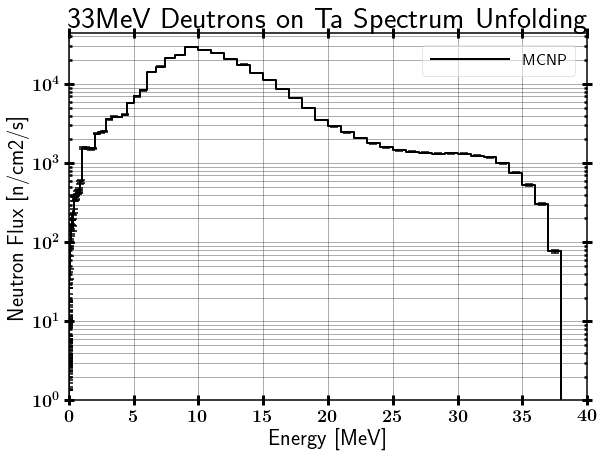

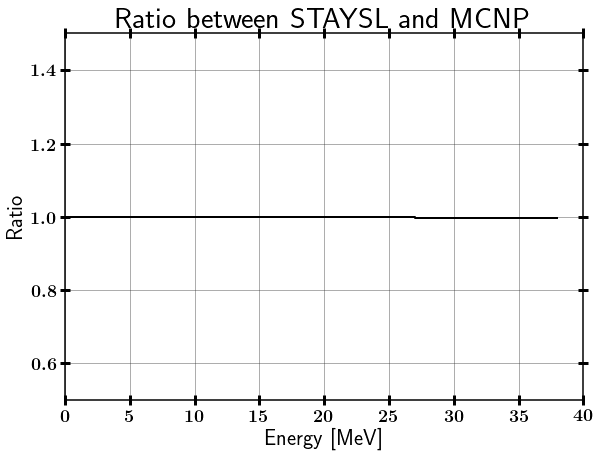

In [10]:
iter = 1

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #3:

  - No modifications are made to the MCNP results for the guess spectrum
  - It does update the uncertainty throughout the convergence process. 

In [12]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration3/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration3/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration3/stayslin.out
Chi^2 = 77.12633, Std Norm = 2.0220578874
Chi^2 = 72.6743
Chi^2 = 71.63764
Chi^2 = 70.49521
Chi^2 = 69.32498
Chi^2 = 68.17904
Chi^2 = 67.085
Chi^2 = 66.0559
Chi^2 = 65.09682
Chi^2 = 64.20673
Chi^2 = 63.38172
Chi^2 = 62.6189
Chi^2 = 61.91305
Chi^2 = 61.2608
Chi^2 = 60.65792
Chi^2 = 60.09985
Chi^2 = 59.58152
Chi^2 = 59.10046
Chi^2 = 58.65187
Chi^2 = 58.23214
Chi^2 = 57.83938
Chi^2 = 57.47124
Chi^2 = 57.12631
Chi^2 = 56.80178
Chi^2 = 56.49571
Chi^2 = 56.20544
Chi^2 = 55.93083
Chi^2 = 55.66898
Chi^2 = 55.41857
Chi^2 = 55.1798
Chi^2 = 54.95088
Chi^2 = 54

Chi^2 = 24.25653
Chi^2 = 24.21757
Chi^2 = 24.17871
Chi^2 = 24.14002
Chi^2 = 24.10098
Chi^2 = 24.06249
Chi^2 = 24.02373
Chi^2 = 23.98497
Chi^2 = 23.94657
Chi^2 = 23.90841
Chi^2 = 23.87062
Chi^2 = 23.83168
Chi^2 = 23.7936
Chi^2 = 23.75607
Chi^2 = 23.71793
Chi^2 = 23.68036
Chi^2 = 23.64238
Chi^2 = 23.60523
Chi^2 = 23.56808
Chi^2 = 23.53081
Chi^2 = 23.49329
Chi^2 = 23.45653
Chi^2 = 23.41963
Chi^2 = 23.38281
Chi^2 = 23.34656
Chi^2 = 23.31005
Chi^2 = 23.2737
Chi^2 = 23.23669
Chi^2 = 23.20035
Chi^2 = 23.16379
Chi^2 = 23.12742
Chi^2 = 23.09145
Chi^2 = 23.05498
Chi^2 = 23.01841
Chi^2 = 22.9824
Chi^2 = 22.94703
Chi^2 = 22.91157
Chi^2 = 22.87633
Chi^2 = 22.84082
Chi^2 = 22.80557
Chi^2 = 22.77024
Chi^2 = 22.73519
Chi^2 = 22.6997
Chi^2 = 22.66504
Chi^2 = 22.63051
Chi^2 = 22.59564
Chi^2 = 22.56068
Chi^2 = 22.52626
Chi^2 = 22.4919
Chi^2 = 22.4572
Chi^2 = 22.42266
Chi^2 = 22.38846
Chi^2 = 22.35364
Chi^2 = 22.31926
Chi^2 = 22.28527
Chi^2 = 22.25099
Chi^2 = 22.217
Chi^2 = 22.18286
Chi^2 = 22.14877
Chi^2

Chi^2 = 13.02356
Chi^2 = 13.01015
Chi^2 = 12.99672
Chi^2 = 12.98346
Chi^2 = 12.97011
Chi^2 = 12.95677
Chi^2 = 12.94369
Chi^2 = 12.9304
Chi^2 = 12.91717
Chi^2 = 12.90389
Chi^2 = 12.89036
Chi^2 = 12.8773
Chi^2 = 12.86416
Chi^2 = 12.85115
Chi^2 = 12.83811
Chi^2 = 12.82492
Chi^2 = 12.81153
Chi^2 = 12.79872
Chi^2 = 12.78633
Chi^2 = 12.7736
Chi^2 = 12.76071
Chi^2 = 12.74765
Chi^2 = 12.73494
Chi^2 = 12.72208
Chi^2 = 12.70954
Chi^2 = 12.69657
Chi^2 = 12.68384
Chi^2 = 12.67099
Chi^2 = 12.65868
Chi^2 = 12.6459
Chi^2 = 12.63329
Chi^2 = 12.62052
Chi^2 = 12.60808
Chi^2 = 12.59552
Chi^2 = 12.58267
Chi^2 = 12.5702
Chi^2 = 12.55762
Chi^2 = 12.54545
Chi^2 = 12.53349
Chi^2 = 12.52087
Chi^2 = 12.50843
Chi^2 = 12.49604
Chi^2 = 12.48397
Chi^2 = 12.47197
Chi^2 = 12.45938
Chi^2 = 12.44692
Chi^2 = 12.43452
Chi^2 = 12.42247
Chi^2 = 12.41049
Chi^2 = 12.39814
Chi^2 = 12.38584
Chi^2 = 12.37353
Chi^2 = 12.36173
Chi^2 = 12.3499
Chi^2 = 12.33778
Chi^2 = 12.32575
Chi^2 = 12.31335
Chi^2 = 12.30134
Chi^2 = 12.2896
Chi^

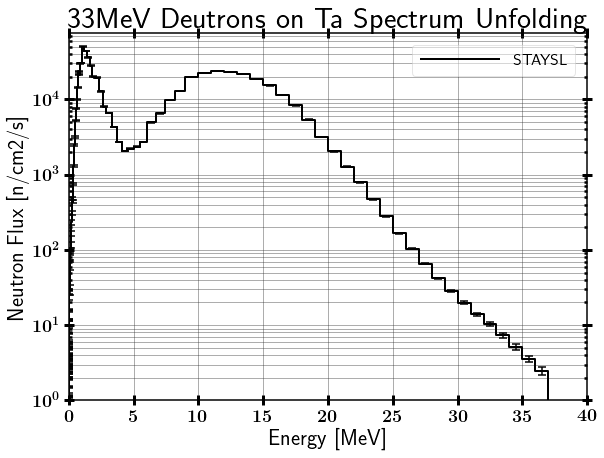

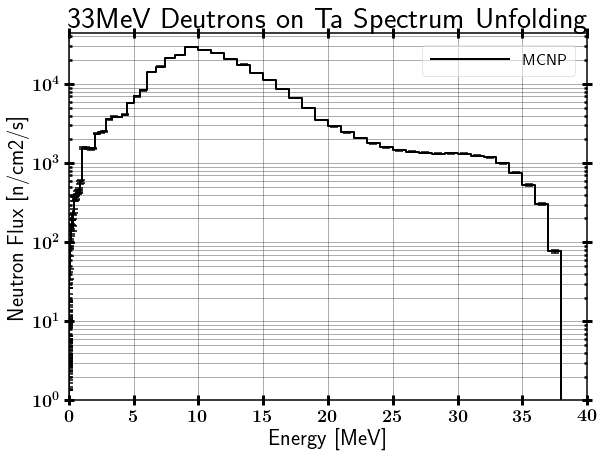

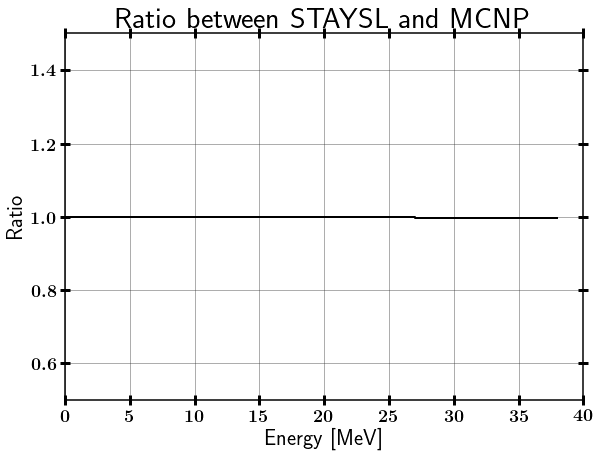

In [23]:
iter = 2

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

#### Create MCNP Input Source

Using this unfold, create the MCNP input source spectrum.

In [24]:
from GeneralNuclear.MCNP import listToMCNPTable

print "E bins: remove first and add last upper to convert from lower edges to upper edges."
listToMCNPTable(iterSoln[iter]._df['lowE'].tolist())
print "Source"
listToMCNPTable(iterSoln[iter]._df['adjFlux'].tolist())

E bins: remove first and add last upper to convert from lower edges to upper edges.
    
     1.0000e-10 1.0000e-09 1.0000e-08 2.3000e-08 5.0000e-08 7.6000e-08
     1.1500e-07 1.7000e-07 2.5500e-07 3.8000e-07 5.5000e-07 8.4000e-07
     1.2750e-06 1.9000e-06 2.8000e-06 4.2500e-06 6.3000e-06 9.2000e-06
     1.3500e-05 2.1000e-05 3.0000e-05 4.5000e-05 6.9000e-05 1.0000e-04
     1.3500e-04 1.7000e-04 2.2000e-04 2.8000e-04 3.6000e-04 4.5000e-04
     5.7500e-04 7.6000e-04 9.6000e-04 1.2750e-03 1.6000e-03 2.0000e-03
     2.7000e-03 3.4000e-03 4.5000e-03 5.5000e-03 7.2000e-03 9.2000e-03
     1.2000e-02 1.5000e-02 1.9000e-02 2.5500e-02 3.2000e-02 4.0000e-02
     5.2500e-02 6.6000e-02 8.8000e-02 1.1000e-01 1.3500e-01 1.6000e-01
     1.9000e-01 2.2000e-01 2.5500e-01 2.9000e-01 3.2000e-01 3.6000e-01
     4.0000e-01 4.5000e-01 5.0000e-01 5.5000e-01 6.0000e-01 6.6000e-01
     7.2000e-01 7.8000e-01 8.4000e-01 9.2000e-01 1.0000e+00 1.2000e+00
     1.4000e+00 1.6000e+00 1.8000e+00 2.0000e+00 2.3000e+00

### Iterative Solution #4:

  - The iterative solution sets the uncertainty for all bins to 100% and sets a unform 1E-7 flux per src.  
  - It does update the uncertainty throughout the convergence process. 

In [15]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration4/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration4/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration4/stayslin.out
Chi^2 = 492.19913, Std Norm = 9.39165764761
Chi^2 = 15.83884
Chi^2 = 12.90723
Chi^2 = 11.33592
Chi^2 = 10.98585
Chi^2 = 10.77967
Chi^2 = 10.62761
Chi^2 = 10.50575
Chi^2 = 10.40402
Chi^2 = 10.31711
Chi^2 = 10.24039
Chi^2 = 10.17249
Chi^2 = 10.11101
Chi^2 = 10.05362
Chi^2 = 10.00069
Chi^2 = 9.95222
Chi^2 = 9.90622
Chi^2 = 9.86329
Chi^2 = 9.82195
Chi^2 = 9.78243
Chi^2 = 9.74464
Chi^2 = 9.70917
Chi^2 = 9.67503
Chi^2 = 9.64283
Chi^2 = 9.61117
Chi^2 = 9.58064
Chi^2 = 9.55185
Chi^2 = 9.52416
Chi^2 = 9.49724
Chi^2 = 9.47087
Chi^2 = 9.44553
Chi^2 = 9.42121
C

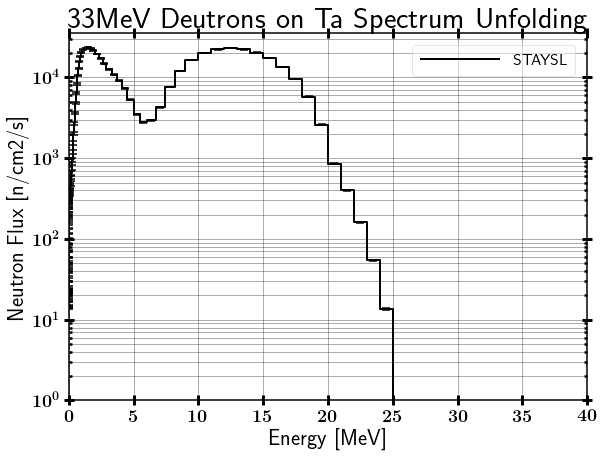

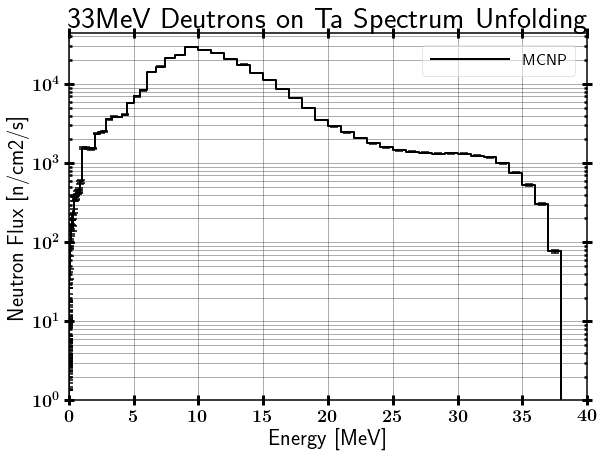

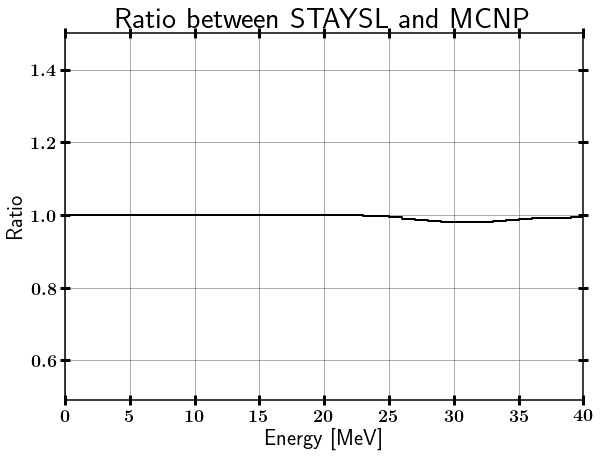

In [16]:
iter = 3

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #5:

  - This solution sets the uncertainty to 100 % for all bins. 
  - The iterative solution uses the MCNP spectrum and sets a nominal 5E-9 flux per src for zero flux bins.  
  - It does update the uncertainty throughout the convergence process. 

In [17]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration5/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration5/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration5/stayslin.out
Chi^2 = 15.77549, Std Norm = 9.55570215997
Chi^2 = 16.72753
Chi^2 = 13.27263
Chi^2 = 12.67966
Chi^2 = 12.36067
Chi^2 = 12.14995
Chi^2 = 11.9991
Chi^2 = 11.88494
Chi^2 = 11.79681
Chi^2 = 11.72629
Chi^2 = 11.66834
Chi^2 = 11.62034
Chi^2 = 11.57928
Chi^2 = 11.54329
Chi^2 = 11.51164
Chi^2 = 11.4829
Chi^2 = 11.4571
Chi^2 = 11.43364
Chi^2 = 11.41162
Chi^2 = 11.39107
Chi^2 = 11.37154
Chi^2 = 11.35322
Chi^2 = 11.33599
Chi^2 = 11.31918
Chi^2 = 11.30282
Chi^2 = 11.28721
Chi^2 = 11.27202
Chi^2 = 11.25715
Chi^2 = 11.24289
Chi^2 = 11.22834
Chi^2 = 11.21474
Chi^2

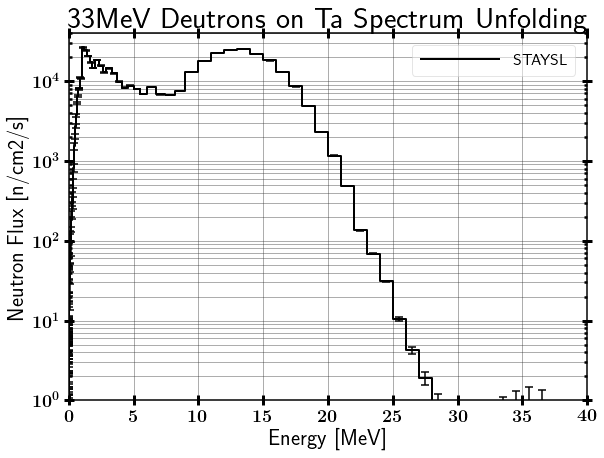

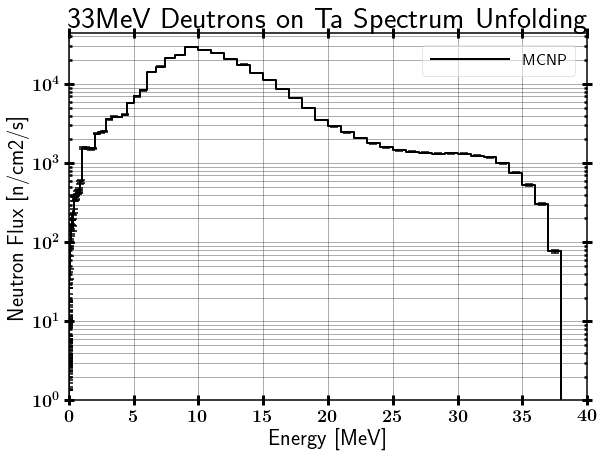

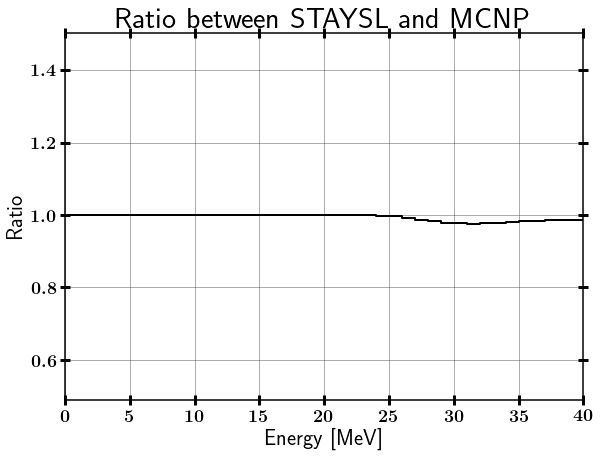

In [18]:
iter = 4

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #6:

  - This solution sets the uncertainty to 100 % for all bins up to 38 MeV. 
  - The iterative solution uses the MCNP spectrum and sets a nominal 5E-9 flux per src for zero flux bins.  
  - It does update the uncertainty throughout the convergence process. 

In [19]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration6/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration6/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration6/stayslin.out
Chi^2 = 15.79611, Std Norm = 8.3372291986
Chi^2 = 16.6724
Chi^2 = 13.23273
Chi^2 = 12.64746
Chi^2 = 12.33497
Chi^2 = 12.12956
Chi^2 = 11.98208
Chi^2 = 11.87107
Chi^2 = 11.78512
Chi^2 = 11.7161
Chi^2 = 11.65967
Chi^2 = 11.61352
Chi^2 = 11.57361
Chi^2 = 11.53929
Chi^2 = 11.50884
Chi^2 = 11.48116
Chi^2 = 11.45609
Chi^2 = 11.43317
Chi^2 = 11.41158
Chi^2 = 11.39158
Chi^2 = 11.37261
Chi^2 = 11.35449
Chi^2 = 11.3374
Chi^2 = 11.32067
Chi^2 = 11.3045
Chi^2 = 11.28901
Chi^2 = 11.27386
Chi^2 = 11.25912
Chi^2 = 11.24466
Chi^2 = 11.23053
Chi^2 = 11.21694
Chi^2 =

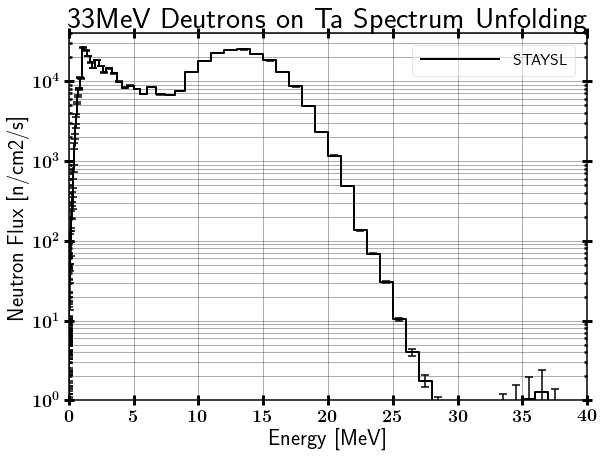

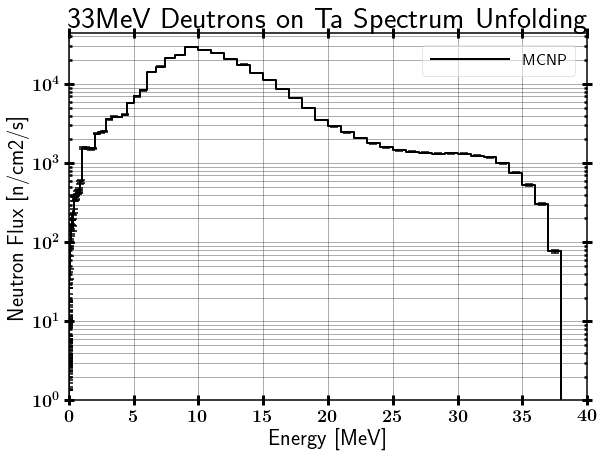

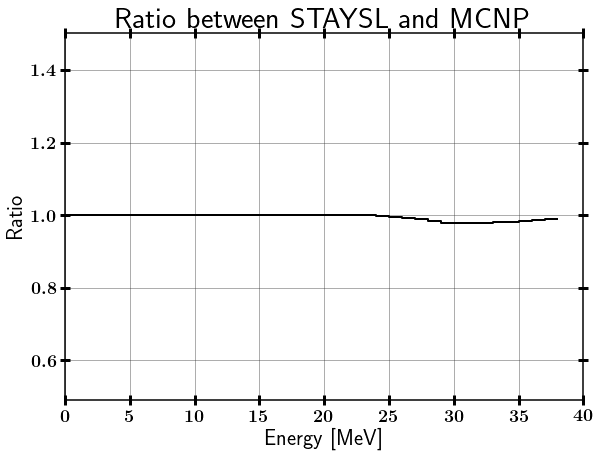

In [20]:
iter = 5

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #7:

  - This solution is the same as #3, but it drops the Al(n, p) channel. 
  - It does update the uncertainty throughout the convergence process. 

In [21]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration7/'
iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.01))
print iterSoln[-1]

iterSoln[-1].run()

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration7/
$\chi^2$ Convergence: 0.01
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration7/stayslin.out
Chi^2 = 63.46154, Std Norm = 2.02206521408
Chi^2 = 56.09359
Chi^2 = 52.96898
Chi^2 = 49.97483
Chi^2 = 47.19873
Chi^2 = 44.64688
Chi^2 = 42.30968
Chi^2 = 40.17196
Chi^2 = 38.21732
Chi^2 = 36.43162
Chi^2 = 34.80309
Chi^2 = 33.31806
Chi^2 = 31.96717
Chi^2 = 30.73917
Chi^2 = 29.62587
Chi^2 = 28.61647
Chi^2 = 27.70019
Chi^2 = 26.86976
Chi^2 = 26.11595
Chi^2 = 25.43241
Chi^2 = 24.81197
Chi^2 = 24.24946
Chi^2 = 23.7399
Chi^2 = 23.27761
Chi^2 = 22.85877
Chi^2 = 22.47766
Chi^2 = 22.13158
Chi^2 = 21.8159
Chi^2 = 21.52881
Chi^2 = 21.26719
Chi^2 = 21.0283
Chi^2

Chi^2 = 11.45899
Chi^2 = 11.44669
Chi^2 = 11.43401
Chi^2 = 11.42176
Chi^2 = 11.40921
Chi^2 = 11.39672
Chi^2 = 11.38438
Chi^2 = 11.37189
Chi^2 = 11.35957
Chi^2 = 11.34723
Chi^2 = 11.33525
Chi^2 = 11.32264
Chi^2 = 11.3107
Chi^2 = 11.29857
Chi^2 = 11.2864
Chi^2 = 11.27421
Chi^2 = 11.26197
Chi^2 = 11.25015
Chi^2 = 11.23787
Chi^2 = 11.22594
Chi^2 = 11.21379
Chi^2 = 11.20165
Chi^2 = 11.18977
Chi^2 = 11.17801
Chi^2 = 11.16606
Chi^2 = 11.1541
Chi^2 = 11.1419
Chi^2 = 11.13018
Chi^2 = 11.11835
Chi^2 = 11.10647
Chi^2 = 11.09426
Chi^2 = 11.08242
Chi^2 = 11.07056
Chi^2 = 11.05898
Chi^2 = 11.04727
Chi^2 = 11.03514
Chi^2 = 11.02332
Chi^2 = 11.01174
Chi^2 = 11.00053
Chi^2 = 10.98843
Chi^2 = 10.97687
Chi^2 = 10.96507
Chi^2 = 10.95383
Chi^2 = 10.94222
Chi^2 = 10.93084
Chi^2 = 10.91976
Chi^2 = 10.90816
Chi^2 = 10.89655
Chi^2 = 10.88472
Chi^2 = 10.87367
Chi^2 = 10.86249
Chi^2 = 10.85096
Chi^2 = 10.83917
Chi^2 = 10.82837
Chi^2 = 10.81662
Chi^2 = 10.80546
Chi^2 = 10.79414
Chi^2 = 10.78285
Chi^2 = 10.77138
C

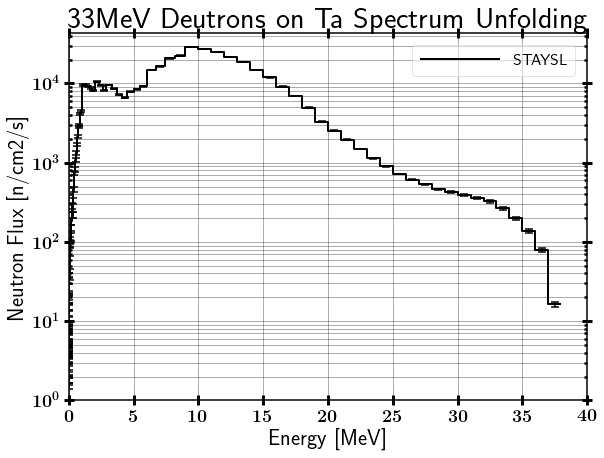

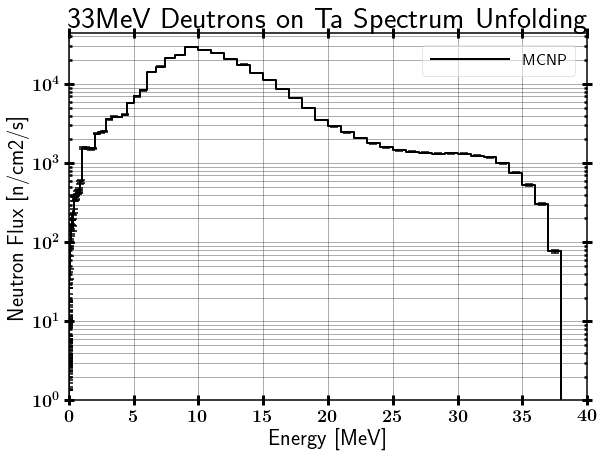

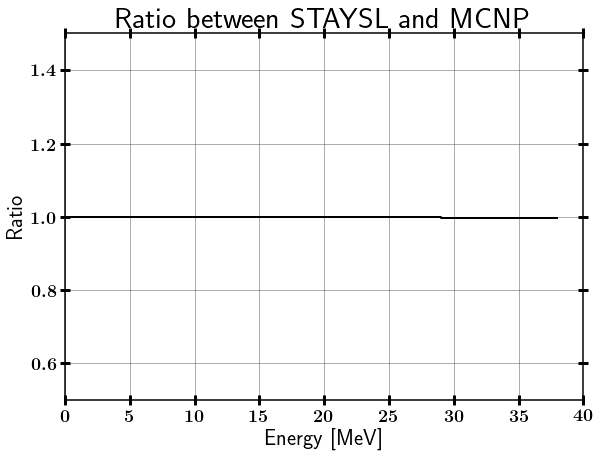

In [22]:
iter = 6

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjFlux'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjFlux']).tolist(),
                             edgeLoc='low', name='STAYSL')

iterAdjHisto[iter].plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]',
              savePath=outpath+'33MeVTa_Staysl-Unfold_Itr{:1d}'.format(iter))

mcnpHisto.plot(xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='33MeV Deutrons on Ta Spectrum Unfolding',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm2/s]')

iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))